In [1]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_excel("commodities_dataset_annotated.xlsx")
data

,No,Classes,Text
0,1,BAD,Copper prices plunged to their lowest level in...
1,2,BAD,Oil plunged more than 6 per cent for the secon...
2,3,NEUTRAL,President Joe Biden will call on Congress to e...
3,4,BAD,The chief executive of Kuwait’s state oil comp...
4,5,GOOD,Oil climbed as financial markets recovered fro...
...,...,...,...
496,497,BAD,Europe appears to be on the brink of an energy...
497,498,NEUTRAL,The two countries appear to have been chosen c...
498,499,NEUTRAL,Current negotiations between Russia and the Tu...
499,500,GOOD,An economy with strong fundamentals is one tha...


In [3]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [4]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

import gensim
data['no_stopwords']=data['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords2']=data['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,No,Classes,Text,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,1,BAD,Copper prices plunged to their lowest level in...,Copper prices plunged to their lowest level in...,copper prices plunged to their lowest level in...,"[copper, prices, plunged, to, their, lowest, l...","[copper, prices, plunged, lowest, level, year,...","[copper, price, plung, lowest, level, year, we...","[copper, price, plung, lowest, level, year, we...",copper price plung lowest level year wednesday...
1,2,BAD,Oil plunged more than 6 per cent for the secon...,Oil plunged more than 6 per cent for the secon...,oil plunged more than 6 per cent for the secon...,"[oil, plunged, more, than, per, cent, for, the...","[oil, plunged, per, cent, second, time, less, ...","[oil, plung, per, cent, second, time, less, we...","[oil, plung, per, cent, second, time, le, week...",oil plung per cent second time le week concern...
2,3,NEUTRAL,President Joe Biden will call on Congress to e...,President Joe Biden will call on Congress to e...,president joe biden will call on congress to e...,"[president, joe, biden, will, call, on, congre...","[president, joe, biden, call, congress, enact,...","[presid, joe, biden, call, congress, enact, ga...","[presid, joe, biden, call, congress, enact, ga...",presid joe biden call congress enact gasolin t...
3,4,BAD,The chief executive of Kuwait’s state oil comp...,The chief executive of Kuwait’s state oil comp...,the chief executive of kuwait’s state oil comp...,"[the, chief, executive, of, kuwait, state, oil...","[chief, executive, kuwait, state, oil, company...","[chief, execut, kuwait, state, oil, compani, s...","[chief, execut, kuwait, state, oil, compani, s...",chief execut kuwait state oil compani said u p...
4,5,GOOD,Oil climbed as financial markets recovered fro...,Oil climbed as financial markets recovered fro...,oil climbed as financial markets recovered fro...,"[oil, climbed, as, financial, markets, recover...","[oil, climbed, financial, markets, recovered, ...","[oil, climb, financi, market, recov, last, wee...","[oil, climb, financi, market, recov, last, wee...",oil climb financi market recov last week rout ...


In [5]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [6]:
v = CountVectorizer()
X = v.fit_transform(data['msg_lemmatized_string']).todense()
y = data['Classes'].to_list()
print(X)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['BAD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'GOOD', 'NEUTRAL', 'GOOD', 'BAD', 'GOOD', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'BAD', 'NEUTRAL', 'GOOD', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'BAD', 'BAD', 'BAD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'GOOD', 'BAD', 'NEUTRAL', 'GOOD', 'GOOD', 'BAD', 'NEUTRAL', 'BAD', 'GOOD', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'GOOD', 'GOOD', 'NEUTRAL', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'BAD', 'NEUTRAL', 'GOOD', 'BAD', 'BAD', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'BAD', 'GOOD', 'BAD', 'NEUTRAL', 'GOOD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'NEUTRAL', 'BAD', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'BAD', 'GOOD',

Accuracy of GNB classifier on training set: 0.99
Accuracy of GNB classifier on test set: 0.54
F1-Score: 0.548
Precision: 0.562
Recall: 0.543


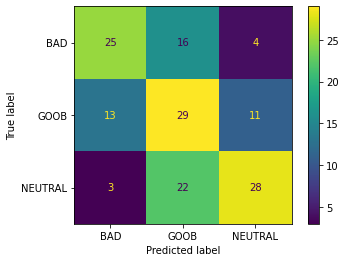

In [8]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
# Scores
print('F1-Score: %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision: %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall: %.3f'%recall_score(y_test, y_pred, average="weighted"))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_dist={
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [11]:
grid=GridSearchCV(gnb,param_grid=param_dist,cv=5,verbose=1,n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [13]:
grid.best_estimator_

GaussianNB(var_smoothing=1.873817422860383e-06)

In [14]:
grid.best_score_

0.5457142857142856

In [15]:
gnb = GaussianNB(var_smoothing=4.328761281083062e-05)

In [16]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(gnb, X, y, cv=5,scoring=scoring)
scores

{'fit_time': array([0.01997519, 0.01792407, 0.02002716, 0.00999403, 0.02000046]),
 'score_time': array([0.009974  , 0.00726962, 0.        , 0.00999904, 0.00999951]),
 'test_accuracy': array([0.42574257, 0.41      , 0.55      , 0.62      , 0.52      ]),
 'test_f1_macro': array([0.42199358, 0.41550092, 0.548713  , 0.61573813, 0.51704842]),
 'test_precision_macro': array([0.43877551, 0.43138928, 0.56917561, 0.61633326, 0.51684724]),
 'test_recall_macro': array([0.42513369, 0.40968509, 0.55109923, 0.61883541, 0.52109329])}